# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from plot_sentiment import plot_sentiment # Created by Dev and Mack!

In [2]:
tweets_2019 = pd.read_csv('../data/tweets/tweets_2019_polarity.csv')
tweets_2020 = pd.read_csv('../data/tweets/tweets_2020_polarity.csv')
tweets_keywords = pd.read_csv('../data/tweets/tweets_keywords_polarity.csv')
infections = pd.read_csv('../data/health/infections.csv')
deaths = pd.read_csv('../data/health/deaths.csv')

In [3]:
# Checks nulls, just to make sure
print(tweets_2019.isnull().sum())
print(tweets_2020.isnull().sum())
print(tweets_keywords.isnull().sum())

text                0
date                0
time                0
city                0
lemmata             0
text_polarity       0
lemmata_polarity    0
top_10              0
dtype: int64
text                0
date                0
city                0
time                0
lemmata             0
text_polarity       0
lemmata_polarity    0
top_10              0
dtype: int64
text                0
date                0
time                0
city                0
lemmata             0
text_polarity       0
lemmata_polarity    0
top_10              0
dtype: int64


In [4]:
# Prints out number of tweets per city
print(tweets_2019['city'].value_counts())
print()
print(tweets_2020['city'].value_counts())
print()
print(tweets_keywords['city'].value_counts())

Washington, D.C.    22568
Seattle             22539
Honolulu            22510
New York City       22490
Manchester          22471
Boston              22361
Little Rock         22345
Birmingham          22192
Omaha               22182
Providence          22156
Salt Lake City      22124
Houston             22121
Oklahoma City       22095
Jackson             21857
Charleston          14680
Jacksonville        13599
Anchorage           12061
Sioux Falls          7584
Newark               6164
Cheyenne             2662
Name: city, dtype: int64

Little Rock         22494
Salt Lake City      22390
Birmingham          22285
Houston             22277
Seattle             22277
Omaha               22186
Manchester          22133
Oklahoma City       22123
Washington, D.C.    22111
Boston              22036
Honolulu            22010
New York City       21926
Providence          21850
Jackson             21306
Anchorage           15083
Jacksonville        14225
Charleston          12832
Sioux Falls 

In [5]:
# Prints min/max/average polarity for both raw and preprocessed text data for each dataframe
df_list = [tweets_2020, tweets_2019, tweets_keywords] 
for df in df_list:
    print('min/max/ave polarity for TEXT column is', df['text_polarity'].min(), df['text_polarity'].max(), df['text_polarity'].mean())
    print('min/max/ave polarity for LEMMATA column is', df['lemmata_polarity'].min(), df['lemmata_polarity'].max(), df['lemmata_polarity'].mean())
    print()

min/max/ave polarity for TEXT column is -0.996 0.9932 0.13612698050189315
min/max/ave polarity for LEMMATA column is -0.996 0.993 0.13138065950039335

min/max/ave polarity for TEXT column is -0.9983 0.9969 0.15232253220920863
min/max/ave polarity for LEMMATA column is -0.9983 0.9969 0.14757537890395134

min/max/ave polarity for TEXT column is -0.9904 0.9869 0.09165359408477924
min/max/ave polarity for LEMMATA column is -0.9867 0.985 0.08310397428895518



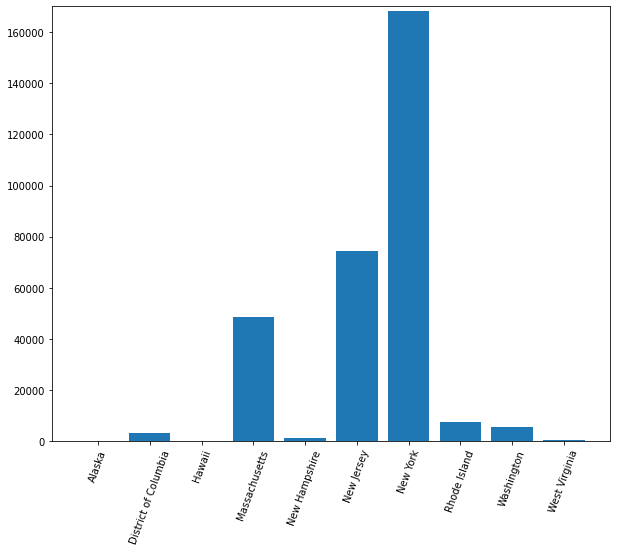

In [6]:
# Looks at infection counts for our April 8-30 timeline for ten most locked down cities
infect_counts = pd.DataFrame(infections[infections['top_10'] == 1].groupby('state')['confirmed_infections'].sum())
plt.figure(figsize=(10, 8))
plt.bar(infect_counts.index, infect_counts['confirmed_infections'])
plt.xticks(infect_counts.index, rotation=70)
plt.ylim(0,170000);

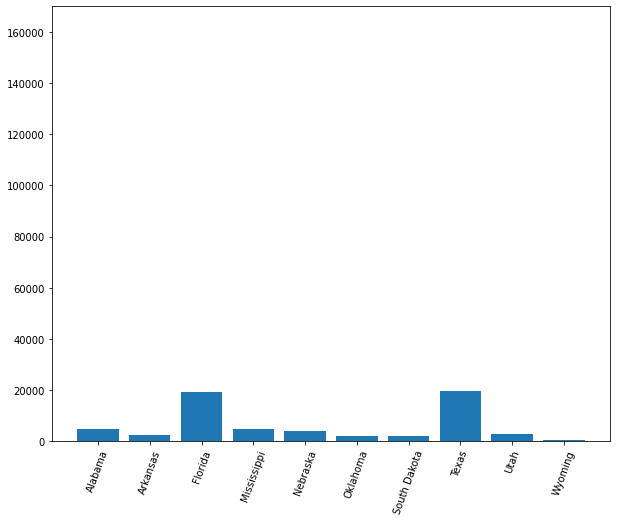

In [7]:
# Looks at infection counts for our April 8-30 timeline for ten least locked down cities
infect_counts = pd.DataFrame(infections[infections['top_10'] == 0].groupby('state')['confirmed_infections'].sum())
plt.figure(figsize=(10, 8))
plt.bar(infect_counts.index, infect_counts['confirmed_infections'])
plt.xticks(infect_counts.index, rotation=70)
plt.ylim(0,170000);

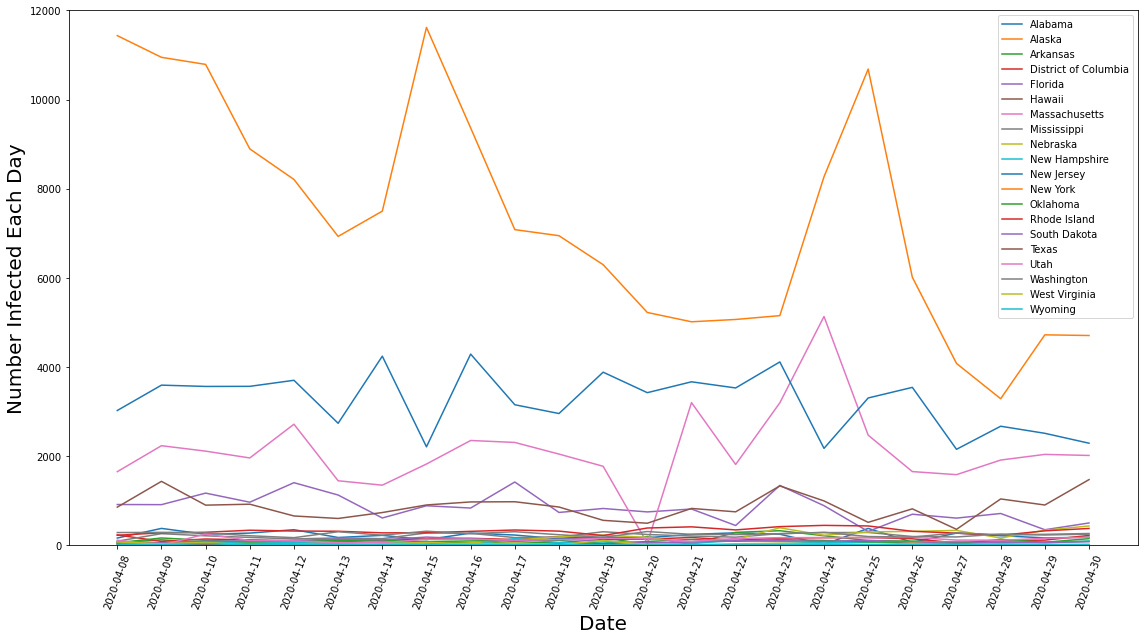

In [8]:
# This cell takes Deven and Mack's function and ammends it to use for infection rate

def plot_polarity(df, city_list=None, sampling='D', color=None, subplots=False, sharey=True, save=None):
    # import cycle to help make city,color tuples
    from itertools import cycle
    from datetime import datetime
    if city_list == None:
        city_list = list(df.state.unique())
    # check for color parameterpull colors list from matplotlib
    if color != None:
        colors = color
    else:
        # if no color param, then pull colors list from matplotlib
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']
    # zip city_list and colors together
    master_list = zip(city_list, cycle(colors))
    # make a copy of df so changes don't apply to original
    df_copy = df.copy()
    # make date column into datetime again
    df_copy.date = pd.to_datetime(df_copy.date)
    # d
    c = 0
    plt.figure(figsize=(16,9));
    for state, color in master_list:
        df_plot = df_copy[df_copy.state == state].resample(sampling, on='date').mean()
        plt.plot(df_plot.dropna().index,  # X axis
                     df_plot['confirmed_infections'].dropna(), # Y axis
                     label = state, 
                     color = color
                    );
        plt.xticks(df_plot.index, rotation=70);
        plt.legend();
        plt.xlabel('Date', fontsize=20);
        plt.ylabel('Number Infected Each Day', fontsize=20);
        plt.ylim(0,12000);
    plt.tight_layout();
plot_polarity(infections)

## Graphing Sentiment Analysis

The rest of this notebook includes graphs comparing tweet sentiments for our datasets. 

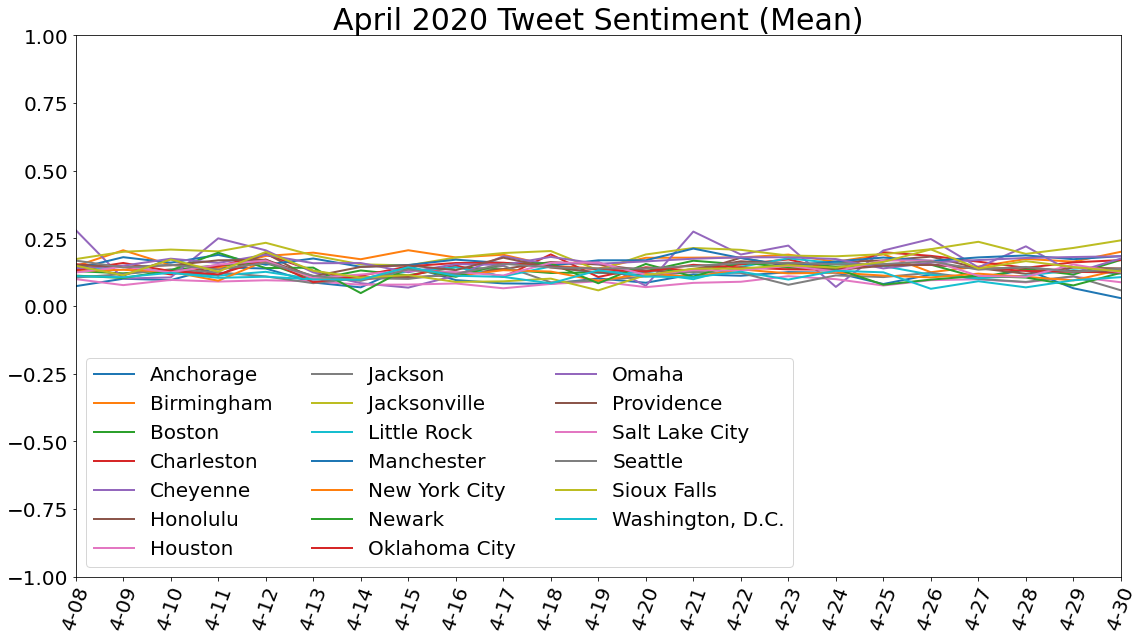

In [9]:
plot_sentiment(tweets_2020, plotting='plots',
              ylim=(-1,1),
              label_font_size=20,
#               save='./png/with_legend/allcities_plot_2020_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=20,
#               remove_legend=True,
              linewidth=2,
              title='April 2020 Tweet Sentiment (Mean)'
             )

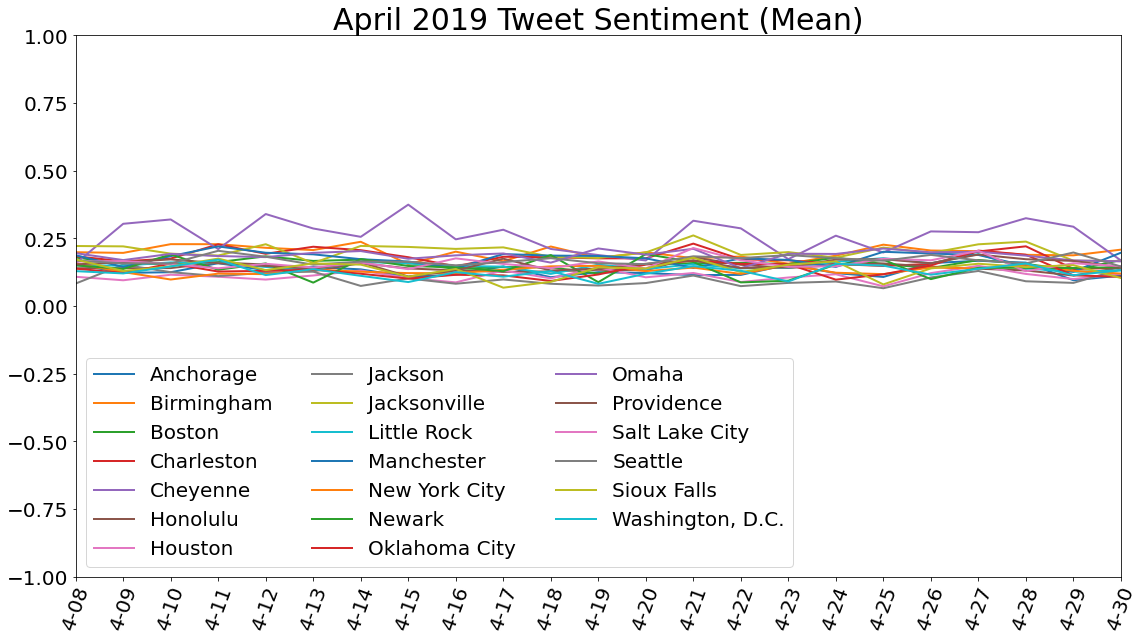

In [10]:
plot_sentiment(tweets_2019, plotting='plots',
              ylim=(-1,1),
              label_font_size=20,
#               save='./png/with_legend/allcities_plot_2019_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=20,
#               remove_legend=True,
              linewidth=2,
              title='April 2019 Tweet Sentiment (Mean)'
             )

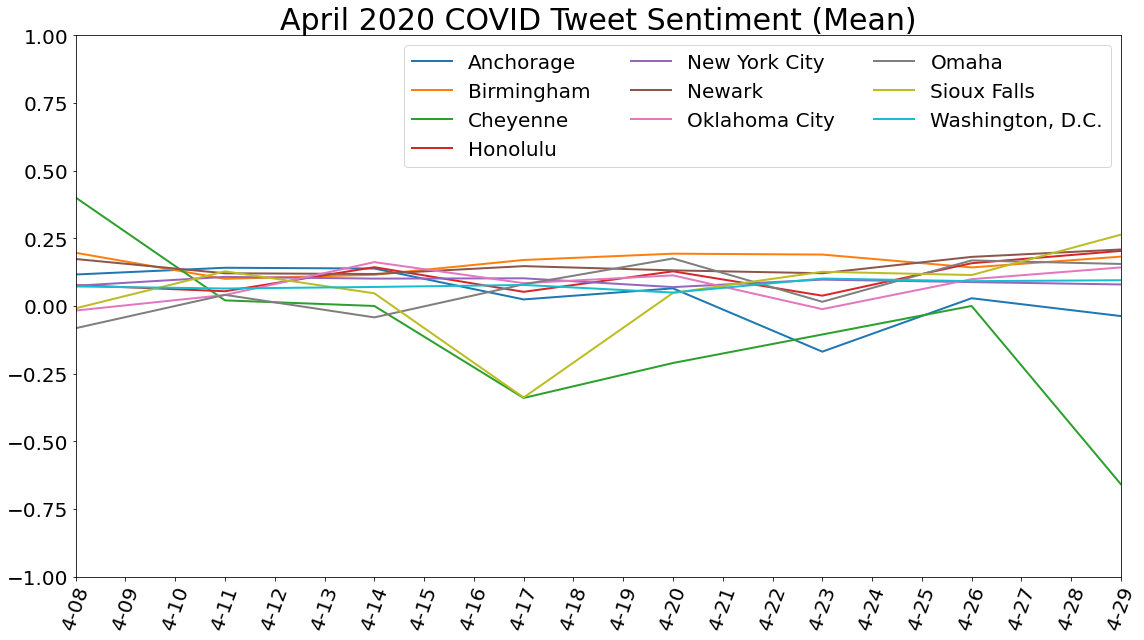

In [11]:
plot_sentiment(tweets_keywords, plotting='plots',
              ylim=(-1,1),
              label_font_size=20,
#               save='./png/with_legend/allcities_COVID_plot_2020_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=20,
#               remove_legend=True,
              linewidth=2,
              title='April 2020 COVID Tweet Sentiment (Mean)'
             )

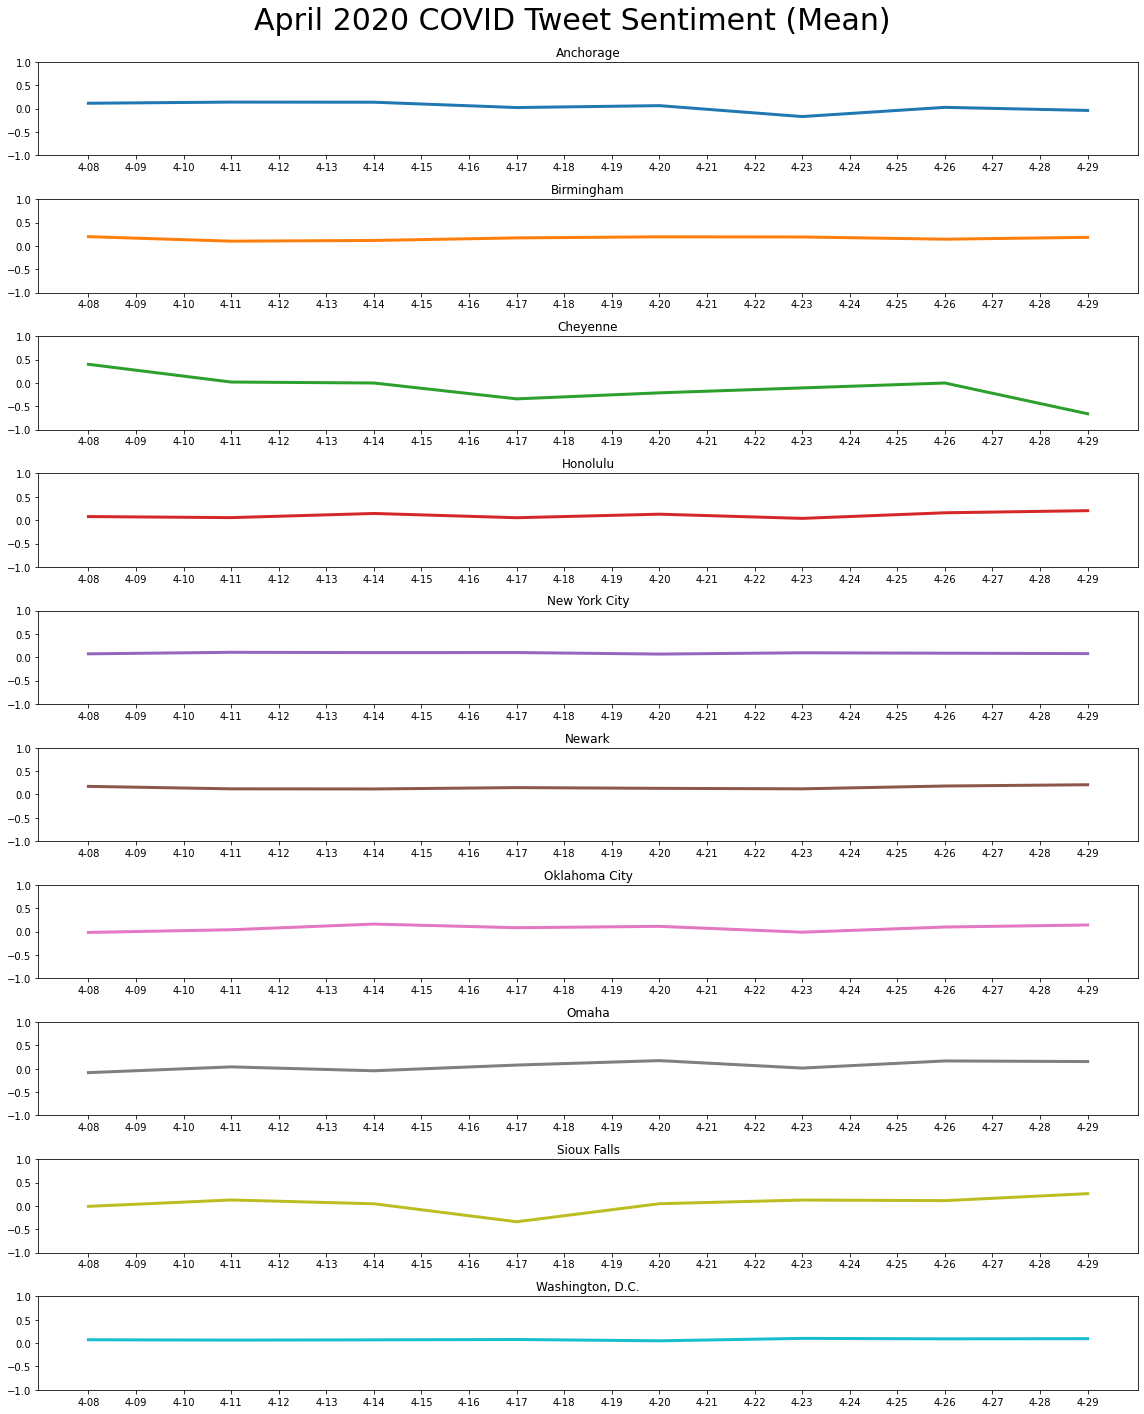

In [12]:
plot_sentiment(tweets_keywords, plotting='subplots',
              ylim=(-1,1),
              sharey=True,
              label_font_size=20,
#               save='./png/with_legend/allcities_COVID_subplot_2020_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=30,
#               remove_legend=True,
              linewidth=3,
              suptitle='April 2020 COVID Tweet Sentiment (Mean)'
             )

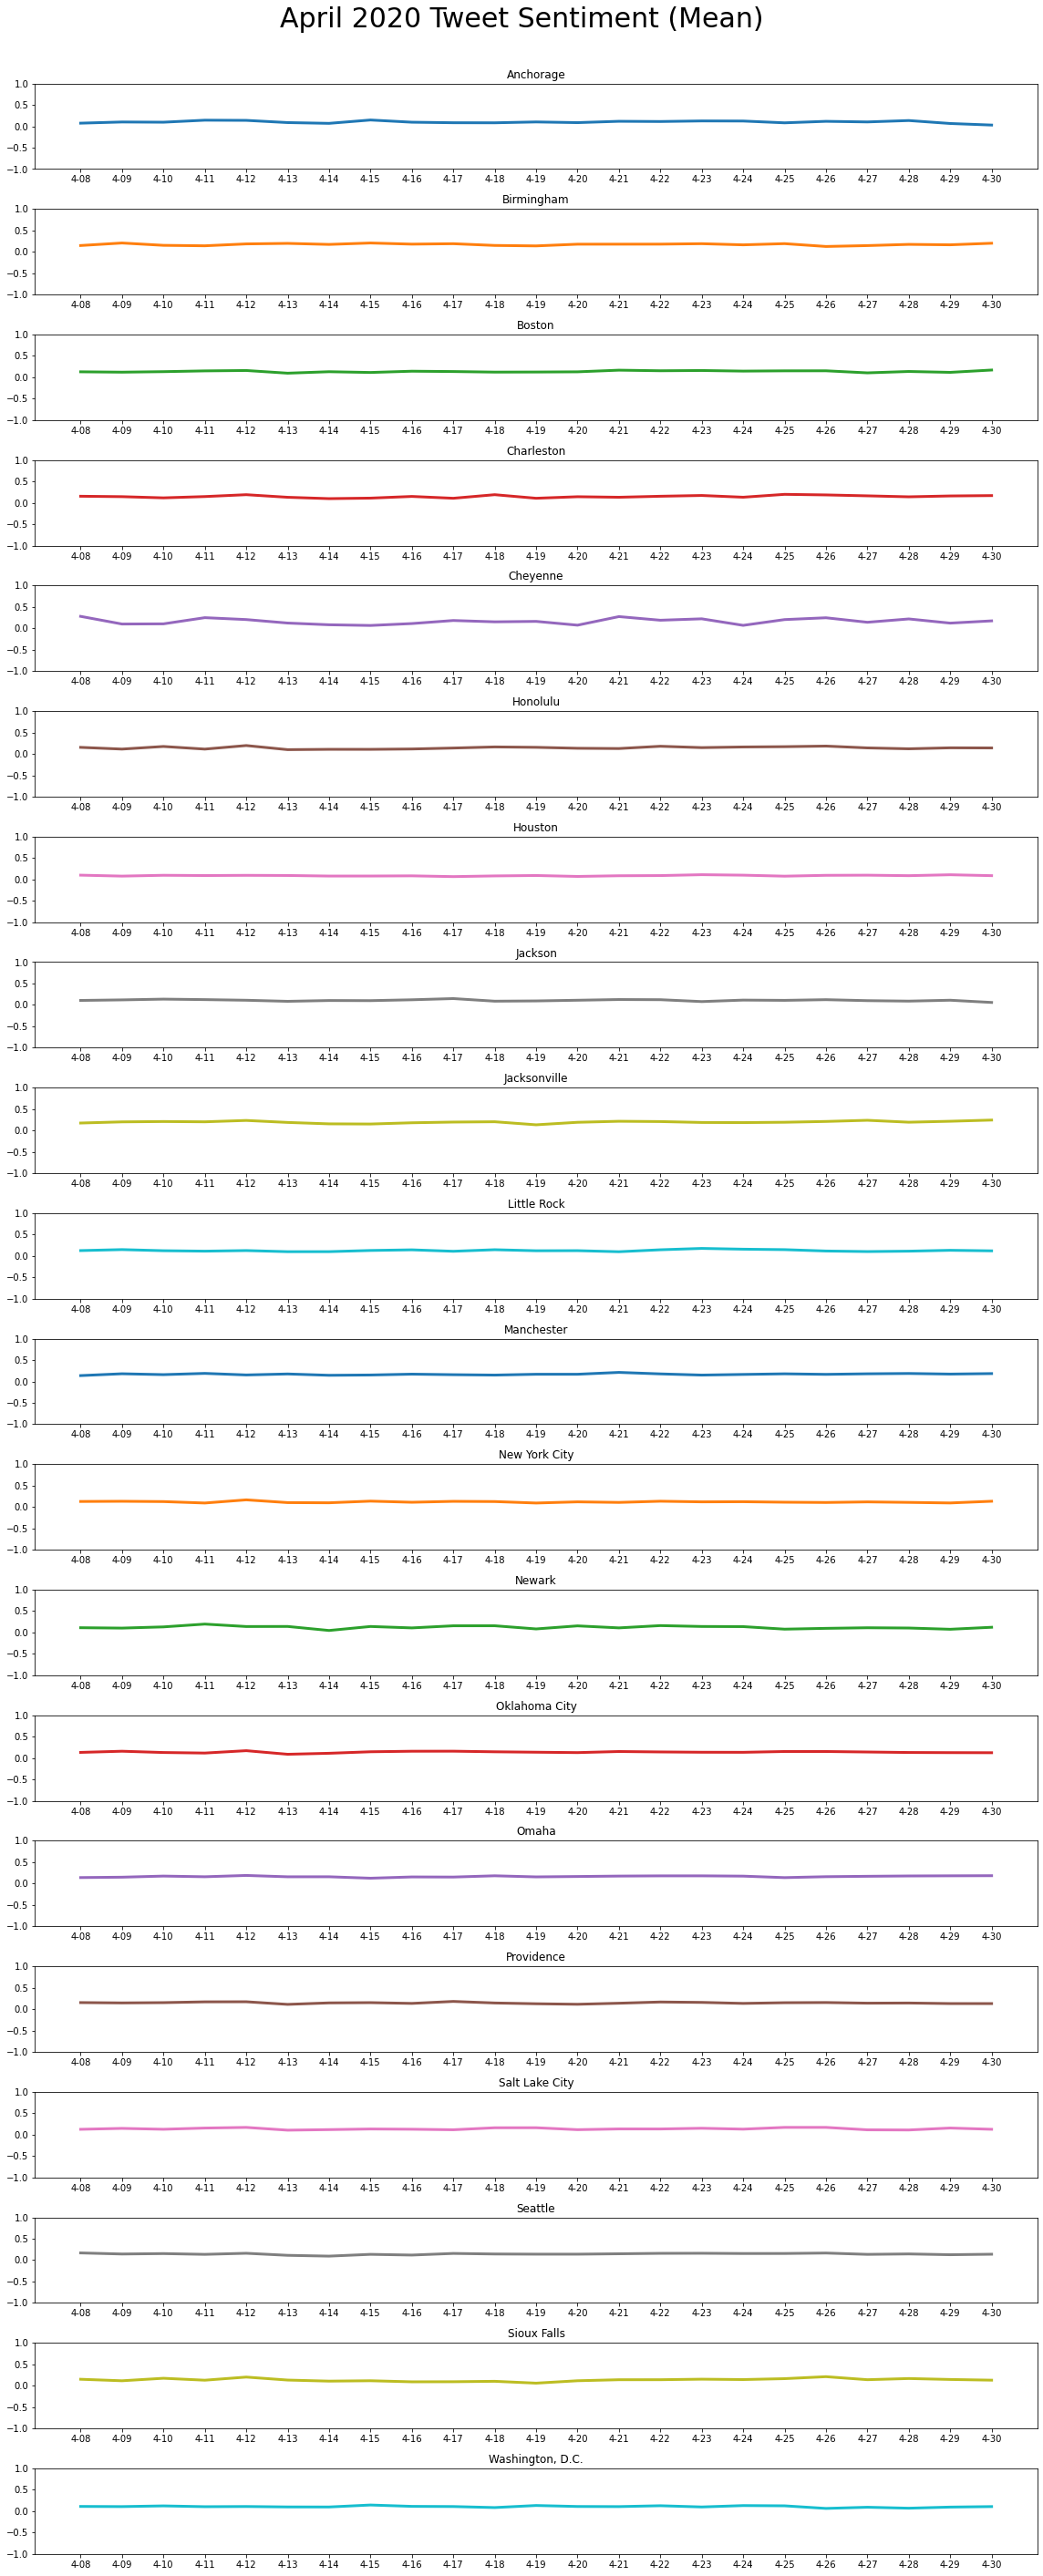

In [13]:
plot_sentiment(tweets_2020, plotting='subplots',
              ylim=(-1,1),
              sharey=True,
              label_font_size=20,
#               save='./png/with_legend/allcities_subplot_2020_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=30,
#               remove_legend=True,
              linewidth=3,
              suptitle='April 2020 Tweet Sentiment (Mean)'
             )


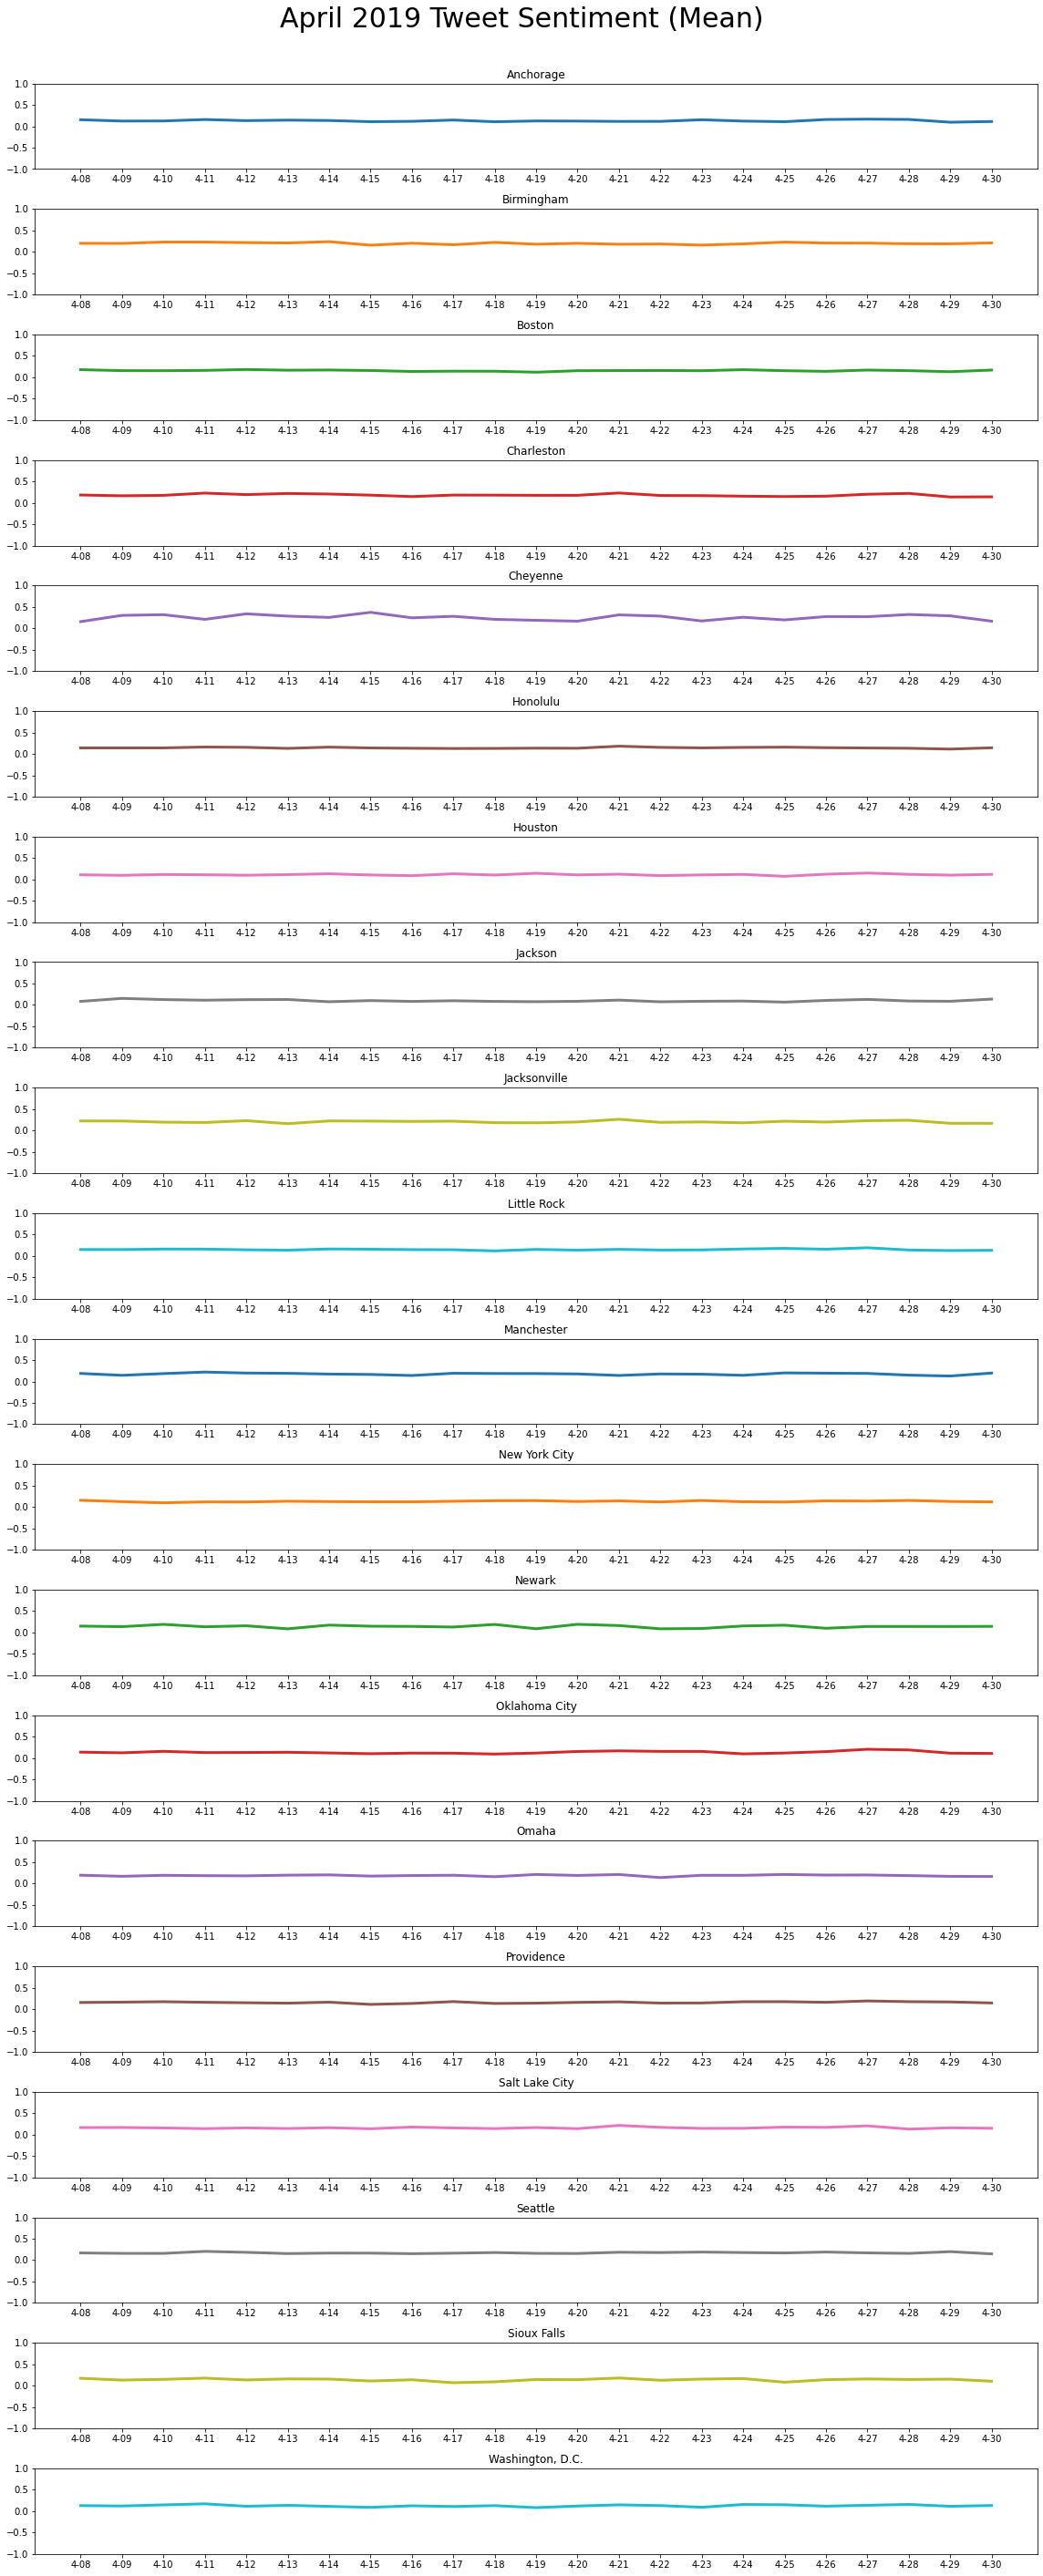

In [14]:
plot_sentiment(tweets_2019, plotting='subplots',
              ylim=(-1,1),
              sharey=True,
              label_font_size=20,
#               save='./png/with_legend/allcities_subplot_2019_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=30,
#               remove_legend=True,
              linewidth=3,
              suptitle='April 2019 Tweet Sentiment (Mean)'
             )

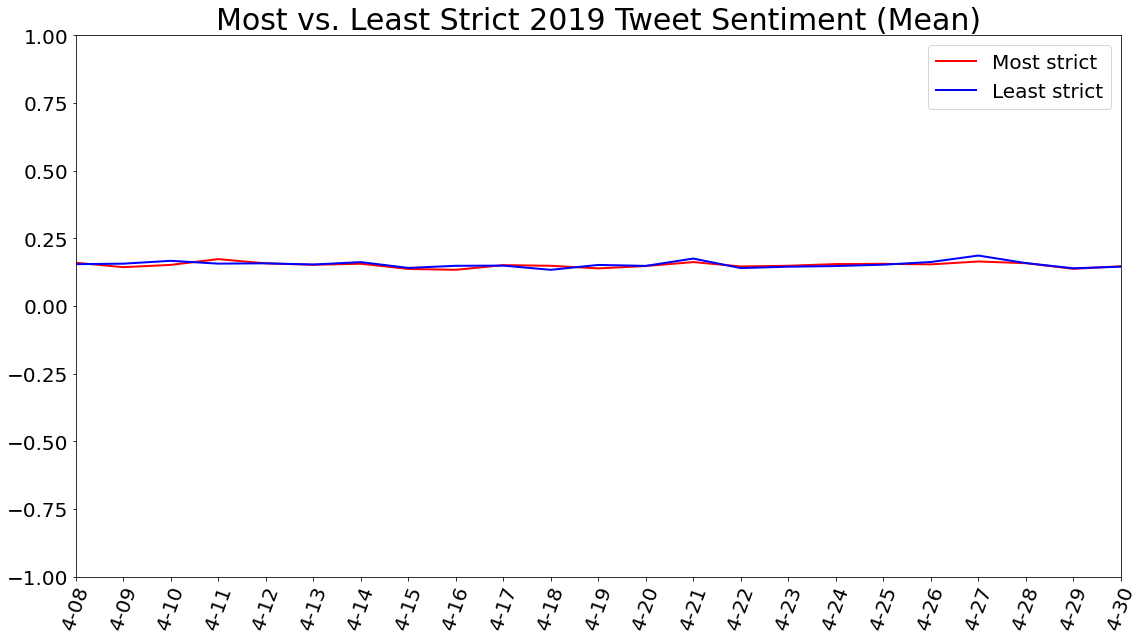

In [15]:
plot_sentiment(tweets_2019, plotting='top10',
              ylim=(-1,1),
#               save='./png/with_legend/top10_2019_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=20,
#               remove_legend=True,
              linewidth=2,
              title='Most vs. Least Strict 2019 Tweet Sentiment (Mean)'
             )

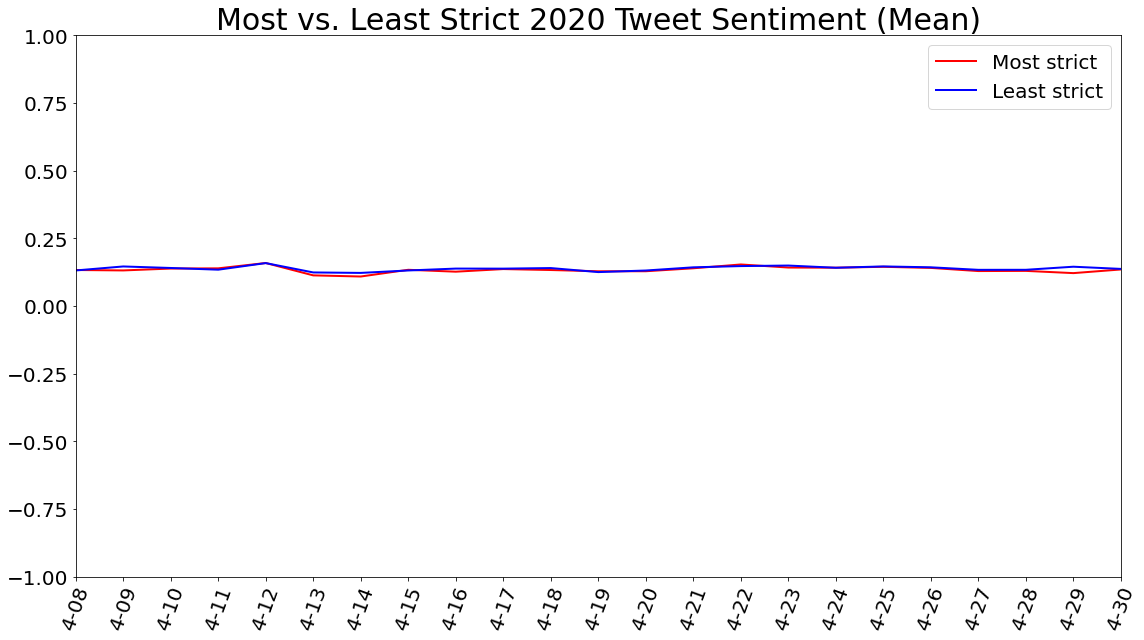

In [16]:
plot_sentiment(tweets_2020, plotting='top10',
              ylim=(-1,1),
#               save='./png/with_legend/top10_2020_with_legend',
#               save_legend=True,
              legend_font_size=20,
              tick_font_size=20,
#               remove_legend=True,
              linewidth=2,
              title='Most vs. Least Strict 2020 Tweet Sentiment (Mean)'
             )